# Anomaly Detection with TCLab Data
Exploring concepts of anomaly detection with supervised machine learning classifiers, using real data generated from the Temperature Control Lab


In [1]:
# Processing and plotting packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Classifier packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

Data is generated with the TCLab; files to generate data can be found at https://github.com/nrlewis929/TCLab_anomaly_detection_basic; the TCLab can be purchased at https://www.amazon.com/TCLab-Temperature-Control-Lab/dp/B07GMFWMRY/

In [2]:
# Import training data
df = pd.read_csv('train.csv')

# Find rolling average temperature to smooth out sensor noise
df['T1_ave'] = df['T1'].rolling(10).mean()

# Split into train and validation datasets
train, val = train_test_split(df, test_size=0.2, shuffle=False)
train = train.copy(deep=True)
val = val.copy(deep=True)

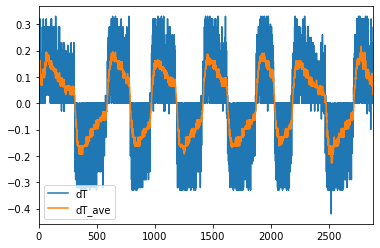

In [3]:
# Demonstrate difference of rolling average smoothing
train['dT'] = train['T1'].diff()
train['dT_ave'] = train['T1_ave'].diff()
train[['dT','dT_ave']].plot()

# Train - Initial
Use the raw training data to train a classifier. This demonstrates the need for feature engineering.

In [4]:
# Split into input and output data
Xtrain = train[['T1']].values
ytrain = train[['Q1']].values

# Formatting shape of y data to remove warning
ytrain = np.ravel(ytrain)

# Scale
s = MinMaxScaler()
Xtrain_s = s.fit_transform(Xtrain)

# Load classifier model; default hyperparameters
lr = LogisticRegression()

# Fit classifier on training data and predict
lr.fit(Xtrain_s,ytrain)
yp = lr.predict(Xtrain_s)
train['LR_predict'] = yp

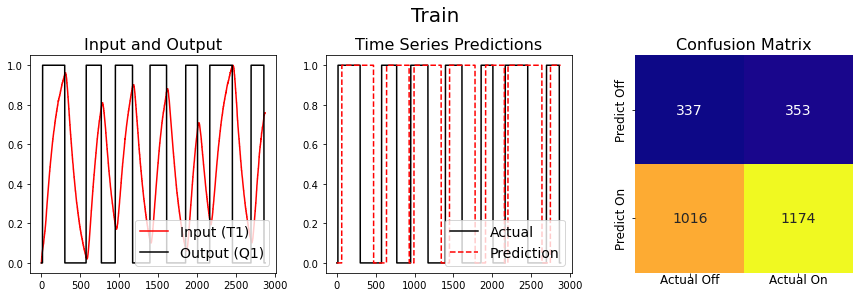

In [5]:
# Plot results as input/output, time series, and  confusion matrix
plt.figure(figsize=(15,4))
plt.suptitle('Train',size=20,y=1.05)

# 1) Inputs and outputs
plt.subplot(131)
plt.title('Input and Output',size=16)
plt.plot(Xtrain_s,'r-',label='Input (T1)')
plt.plot(ytrain,'k-',label='Output (Q1)')
plt.legend(loc='lower right',fontsize=14);

# 1) Time series plot
plt.subplot(132)
plt.title('Time Series Predictions',size=16)
plt.plot(train['Q1'],'k-',label='Actual')
plt.plot(train['LR_predict'],'r--',label='Prediction')
plt.legend(loc='lower right',fontsize=14)

# 2) Confusion matrix plot (false positive, false negative, true positive, true negative)
confusion = metrics.confusion_matrix(yp,ytrain) 
plt.subplot(133)
plt.title('Confusion Matrix',size=16)
ax = sns.heatmap(confusion, annot=True, cmap='plasma',square=True,cbar=False,fmt='g',annot_kws={"size": 14})
ax.set_xticklabels(['Actual Off','Actual On'],va='center',size=12)
ax.set_yticklabels(['Predict Off','Predict On'],va='center',size=12);

# Train - Final
Use the training data to:
1. Create a new feature for the classifier (change in Temperature)
2. Scale the input data (output data is already 0 or 1)
3. Train Logistic Regression classifier
4. Plot predictions for basic check

In [6]:
# Add change in Temperature as a new feature
train['dT'] = train['T1_ave'].diff()

# Drop empty columns and reset index
train.dropna(inplace=True)
train.reset_index(drop=True,inplace=True)

# Split into input and output data
Xtrain = train[['dT']].values
ytrain = train[['Q1']].values

# Formatting shape of y data to remove warning
ytrain = np.ravel(ytrain)

# Scale
s = MinMaxScaler()
Xtrain_s = s.fit_transform(Xtrain)

# Load classifier model; default hyperparameters
lr = LogisticRegression()

# Fit classifier on training data and predict
lr.fit(Xtrain_s,ytrain)
yp = lr.predict(Xtrain_s)
train['LR_predict'] = yp

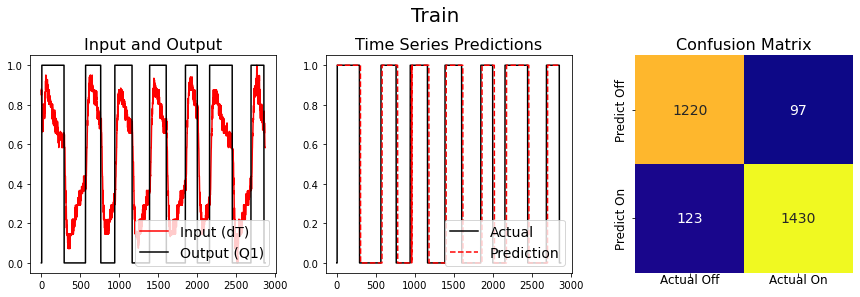

In [7]:
# Plot results as input/output, time series, and  confusion matrix
plt.figure(figsize=(15,4))
plt.suptitle('Train',size=20,y=1.05)

# 1) Inputs and outputs
plt.subplot(131)
plt.title('Input and Output',size=16)
plt.plot(Xtrain_s,'r-',label='Input (dT)')
plt.plot(ytrain,'k-',label='Output (Q1)')
plt.legend(loc='lower right',fontsize=14);

# 1) Time series plot
plt.subplot(132)
plt.title('Time Series Predictions',size=16)
plt.plot(train['Q1'],'k-',label='Actual')
plt.plot(train['LR_predict'],'r--',label='Prediction')
plt.legend(loc='lower right',fontsize=14)

# 2) Confusion matrix plot (false positive, false negative, true positive, true negative)
confusion = metrics.confusion_matrix(yp,ytrain) 
plt.subplot(133)
plt.title('Confusion Matrix',size=16)
ax = sns.heatmap(confusion, annot=True, cmap='plasma',square=True,cbar=False,fmt='g',annot_kws={"size": 14})
ax.set_xticklabels(['Actual Off','Actual On'],va='center',size=12)
ax.set_yticklabels(['Predict Off','Predict On'],va='center',size=12);

# Validation
Test the classifier performance on new data, carrying out the same preprocessing steps:
1. Create a new feature for the classifier (change in Temperature)
2. Scale the input data (output data is already 0 or 1)
3. Predict using Logistic Regression classifier
4. Plot predictions to check performance

In [8]:
# Add change in Temperature as a new feature
val['dT'] = val['T1_ave'].diff()
val.dropna(inplace=True)
val.reset_index(drop=True,inplace=True)

# Input and output data for LR 
Xval = val[['dT']].values
yval = val[['Q1']].values

# Formatting shape of y data to remove warning
yval = np.ravel(yval)

# Scale and save to dataframe
Xval_s = s.transform(Xval)

# Predict with classifier and save to dataframe
yp = lr.predict(Xval_s)
val['LR_predict'] = yp


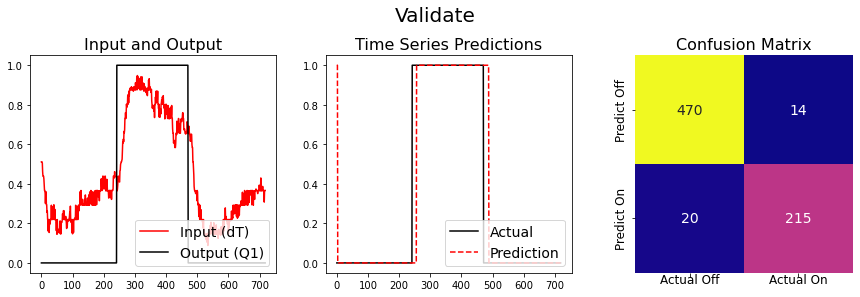

In [9]:
# Plot results as input/output, time series, and  confusion matrix
plt.figure(figsize=(15,4))
plt.suptitle('Validate',size=20,y=1.05)

# 1) Inputs and outputs
plt.subplot(131)
plt.title('Input and Output',size=16)
plt.plot(Xval_s,'r-',label='Input (dT)')
plt.plot(yval,'k-',label='Output (Q1)')
plt.legend(loc='lower right',fontsize=14);

# 1) Time series plot
plt.subplot(132)
plt.title('Time Series Predictions',size=16)
plt.plot(val['Q1'],'k-',label='Actual')
plt.plot(val['LR_predict'],'r--',label='Prediction')
plt.legend(loc='lower right',fontsize=14)

# 2) Confusion matrix plot (false positive, false negative, true positive, true negative)
confusion = metrics.confusion_matrix(yp,yval) 
plt.subplot(133)
plt.title('Confusion Matrix',size=16)
ax = sns.heatmap(confusion, annot=True, cmap='plasma',square=True,cbar=False,fmt='g',annot_kws={"size": 14})
ax.set_xticklabels(['Actual Off','Actual On'],va='center',size=12)
ax.set_yticklabels(['Predict Off','Predict On'],va='center',size=12);

# Anomaly
Now use the classifier on a new set of data with some anamalous behavior (fan blowing across the heater).
1. Create a new feature for the classifier (change in Temperature)
2. Scale the input data (output data is already 0 or 1)
3. Predict using Logistic Regression classifier
4. Plot predictions and note any anomalies

In [10]:
# Import anomalous data
anom = pd.read_csv('test.csv')

# Use average temperature to smooth out sensor noise
anom['T1_ave'] = anom['T1'].rolling(10).mean()

# Add change in Temperature as a new feature
anom['dT'] = anom['T1_ave'].diff()
anom.dropna(inplace=True)
anom.reset_index(drop=True,inplace=True)

# Retrieve values when the fan goes on and off
fan = anom['fan'].diff()[anom['fan'].diff() != 0].index.values
fan_on,fan_off = fan[1],fan[2]

# Classifier input and output values
Xanom = anom[['dT']].values
yanom = anom[['Q1']].values

# Formatting shape of y data to remove warning
yanom = np.ravel(yanom)

# Scale
Xanom_s = s.transform(Xanom)

# Predict with classifier
yp = lr.predict(Xanom_s)
anom['LR_predict'] = yp


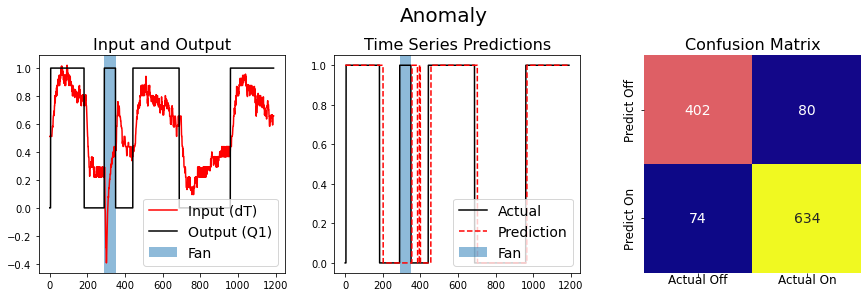

In [11]:
# Plot results as input/output, time series, and  confusion matrix
plt.figure(figsize=(15,4))
plt.suptitle('Anomaly',size=20,y=1.05)

# 1) Inputs and outputs
plt.subplot(131)
plt.title('Input and Output',size=16)
plt.plot(Xanom_s,'r-',label='Input (dT)')
plt.plot(yanom,'k-',label='Output (Q1)')
plt.axvspan(fan_on,fan_off,alpha=0.5,label='Fan')
plt.legend(loc='lower right',fontsize=14);

# 1) Time series plot
plt.subplot(132)
plt.title('Time Series Predictions',size=16)
plt.plot(anom['Q1'],'k-',label='Actual')
plt.plot(anom['LR_predict'],'r--',label='Prediction')
plt.axvspan(fan_on,fan_off,alpha=0.5,label='Fan')
plt.legend(loc='lower right',fontsize=14)

# 2) Confusion matrix plot (false positive, false negative, true positive, true negative)
confusion = metrics.confusion_matrix(yp,yanom) 
plt.subplot(133)
plt.title('Confusion Matrix',size=16)
ax = sns.heatmap(confusion, annot=True, cmap='plasma',square=True,cbar=False,fmt='g',annot_kws={"size": 14})
ax.set_xticklabels(['Actual Off','Actual On'],va='center',size=12)
ax.set_yticklabels(['Predict Off','Predict On'],va='center',size=12);